<a href="https://colab.research.google.com/github/chasubeen/ESAA_8th_OB/blob/Week_12/%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EB%94%A5%EB%9F%AC%EB%8B%9D%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_3.%20%EC%BC%80%EB%9D%BC%EC%8A%A4(Keras)_Part%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4. 모델 세부 설정**

In [ ]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

11490434/11490434 [==============================] - 0s 0us/step
train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


## **4-1. 초기화**

In [ ]:
dense = tf.keras.layers.Dense(256, activation = 'relu')
dense.get_config()['kernel_initializer']

{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

In [ ]:
# he normal 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer = 'he_normal', activation = 'relu')
dense.get_config()['kernel_initializer']

{'module': 'keras.initializers',
 'class_name': 'HeNormal',
 'config': {'seed': None},
 'registered_name': None}

## **4-2. 규제**

In [ ]:
# 기본 값

dense = tf.keras.layers.Dense(256, activation = 'relu')
dense.get_config()

{'name': 'dense_2',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [ ]:
# l1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer = 'l1', activation = 'relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha 값 변경
regularizer = tf.keras.regularizers.l1(l1 = 0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer = regularizer, activation = 'relu')
print(dense.get_config()['kernel_regularizer'])

{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


## **4-3. 드롭아웃**

In [ ]:
# Dropout 25% 비율 적용(25%의 노드가 삭제)

tf.keras.layers.Dropout(0.25)

## **4-4. 배치 정규화**

In [ ]:
# Model A: Dense + ReLU

model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Model B: Dense + BatchNorm + ReLU

model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

## **4-5. 활성화 함수**

In [ ]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha = 0.2 로 변경
tf.keras.layers.LeakyReLU(alpha = 0.2)

In [ ]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)

model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha = 0.2 적용
    tf.keras.layers.LeakyReLU(alpha = 0.2),
    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha = 0.2 적용
    tf.keras.layers.LeakyReLU(alpha = 0.2),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

# 모델 요약
model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

**모델 성능(수렴 속도) 비교**

In [ ]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train,
                        validation_data = (x_test, y_test),
                        epochs = 10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train,
                        validation_data = (x_test, y_test),
                        epochs = 10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train,
                        validation_data = (x_test, y_test),
                        epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2902 - accuracy: 0.9162 - val_loss: 0.1469 - val_accuracy: 0.9563
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1367 - accuracy: 0.9601 - val_loss: 0.1215 - val_accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0997 - accuracy: 0.9692 - val_loss: 0.1049 - val_accuracy: 0.9672
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0781 - accuracy: 0.9762 - val_loss: 0.1010 - val_accuracy: 0.9680
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0646 - accuracy: 0.9797 - val_loss: 0.1031 - val_accuracy: 0.9699
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0544 - accuracy: 0.9824 - val_loss: 0.0924 - val_accuracy: 0.9754
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0447 - accuracy: 0.9858 - val_loss: 0.0915 - val_accuracy:

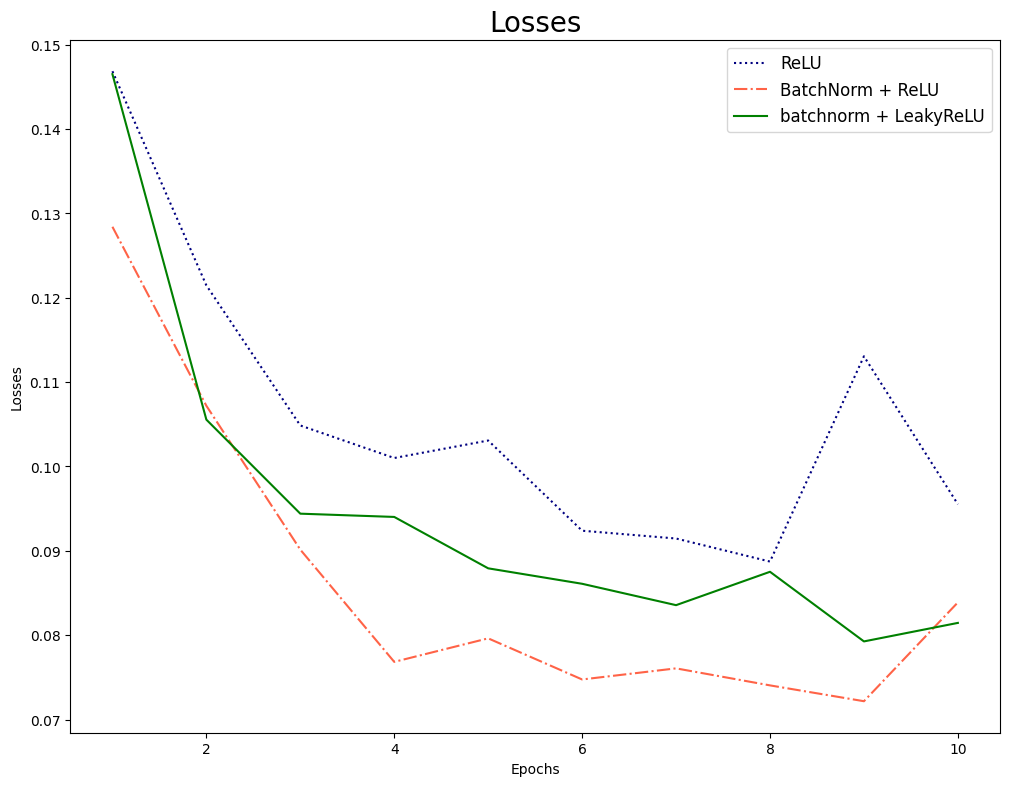

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color = 'navy', linestyle = ':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color = 'tomato', linestyle = '-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color = 'green', linestyle = '-')

plt.title('Losses', fontsize = 20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize = 12)
plt.show()

# **6. 모델 저장 및 불러오기**

In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'), # 노드는 10개가 되어야 한다.
])

In [3]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train,
            validation_data = (x_test, y_test),
            epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2395 - accuracy: 0.9290 - val_loss: 0.1078 - val_accuracy: 0.9671
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0896 - accuracy: 0.9720 - val_loss: 0.0976 - val_accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0644 - accuracy: 0.9800 - val_loss: 0.0839 - val_accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0477 - accuracy: 0.9841 - val_loss: 0.0781 - val_accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0396 - accuracy: 0.9872 - val_loss: 0.0869 - val_accuracy: 0.9748
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0328 - accuracy: 0.9893 - val_loss: 0.0828 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0273 - accuracy: 0.9908 - val_loss: 0.0826 - val_acc

## **6-1. 모델을 파일로 저장**

In [4]:
# 모델을 h5 포맷으로 저장
model.save('h5-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **6-2. 저장된 모델을 복원**

In [5]:
# 모델 복원

h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219818 (858.66 KB)
Trainable params: 219818 (858.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# 모델 검증

loss, acc = h5_model.evaluate(x_test, y_test, verbose = 0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.10447, acc: 0.97700


## **SavedModel 포맷으로 저장**

In [7]:
# 모델을 SavedModel 포맷으로 저장

model.save('saved-model')

In [8]:
# 모델 복원

saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219818 (858.66 KB)
Trainable params: 219818 (858.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# 모델 검증 (HDF5 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

# 모델 검증 (SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.10447, acc: 0.97700
saved_model] loss: 0.10447, acc: 0.97700


- 모델이 동일하게 저장되고 복원된 것을 확인할 수 있음

# **7. 복잡한 모델 생성**

In [10]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

## **7-1. 함수형 API**

### **Sequential API**

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

### **Fuctional API**

In [13]:
## 1. Input 레이어 정의
# 모델의 레이어를 체인 구조로 연결
input_layer = tf.keras.Input(shape=(28, 28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [14]:
# 모델 생성
func_model = tf.keras.Model(inputs = input_layer, outputs = x4, name = 'FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


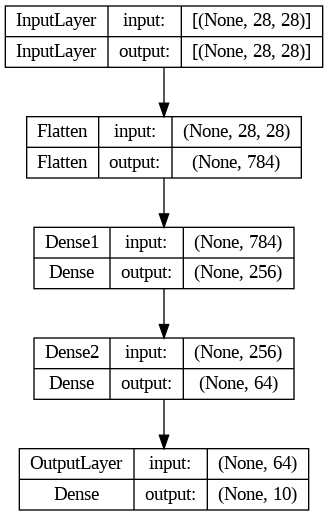

In [15]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [16]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2120 - accuracy: 0.9370
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0880 - accuracy: 0.9727
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0606 - accuracy: 0.9807
Functional Model] loss: 0.08119, acc: 0.97550


## **7-2. Model Subsclassing**

In [19]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(256, activation='relu')
    self.dense2 = tf.keras.layers.Dense(64, activation='relu')
    self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

  # class overiding
  # 학습용 함수 정의
  # x는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)

    return x

In [20]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape = (28, 28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_11 (Dense)            multiple                  200960    
                                                                 
 dense_12 (Dense)            multiple                  16448     
                                                                 
 dense_13 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2123 - accuracy: 0.9376
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0859 - accuracy: 0.9738
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0600 - accuracy: 0.9815
Subclassing Model] loss: 0.07978, acc: 0.97660


## **7-3. 서브클래싱 모델 파라미터를 활용한 생성**

In [22]:
class MyModel(tf.keras.Model):
  # 생성자 parameter 추가
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(units, activation='relu')
    self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')

  # class overiding
  # 학습용 함수 정의
  # x는 input
  def call(self, x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [23]:
# 모델 생성
mymodel = MyModel(256, 10) # 기준이 되는 unit의 개수로 동적으로 초기화

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_14 (Dense)            multiple                  200960    
                                                                 
 dense_15 (Dense)            multiple                  16448     
                                                                 
 dense_16 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w. parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2146 - accuracy: 0.9366
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0889 - accuracy: 0.9731
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0628 - accuracy: 0.9802
Subclassing Model w. parameters] loss: 0.08502, acc: 0.97460
